In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [2]:
from google.colab import files
files.upload()

Saving heart.csv to heart.csv


{'heart.csv': b'\xef\xbb\xbfage,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target\r\n63,1,3,145,233,1,0,150,0,2.3,0,0,1,1\r\n37,1,2,130,250,0,1,187,0,3.5,0,0,2,1\r\n41,0,1,130,204,0,0,172,0,1.4,2,0,2,1\r\n56,1,1,120,236,0,1,178,0,0.8,2,0,2,1\r\n57,0,0,120,354,0,1,163,1,0.6,2,0,2,1\r\n57,1,0,140,192,0,1,148,0,0.4,1,0,1,1\r\n56,0,1,140,294,0,0,153,0,1.3,1,0,2,1\r\n44,1,1,120,263,0,1,173,0,0,2,0,3,1\r\n52,1,2,172,199,1,1,162,0,0.5,2,0,3,1\r\n57,1,2,150,168,0,1,174,0,1.6,2,0,2,1\r\n54,1,0,140,239,0,1,160,0,1.2,2,0,2,1\r\n48,0,2,130,275,0,1,139,0,0.2,2,0,2,1\r\n49,1,1,130,266,0,1,171,0,0.6,2,0,2,1\r\n64,1,3,110,211,0,0,144,1,1.8,1,0,2,1\r\n58,0,3,150,283,1,0,162,0,1,2,0,2,1\r\n50,0,2,120,219,0,1,158,0,1.6,1,0,2,1\r\n58,0,2,120,340,0,1,172,0,0,2,0,2,1\r\n66,0,3,150,226,0,1,114,0,2.6,0,0,2,1\r\n43,1,0,150,247,0,1,171,0,1.5,2,0,2,1\r\n69,0,3,140,239,0,1,151,0,1.8,2,2,2,1\r\n59,1,0,135,234,0,1,161,0,0.5,1,0,3,1\r\n44,1,2,130,233,0,1,179,1,0.4,2,0,2,1\r\n42,1,0,140,226,

In [3]:
df=pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
# 5 point summary
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


**Data cleansing**

In [6]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
for i in df.columns:
  if abs(df[i].skew())>0.5:
    print(i,df[i].skew())

sex -0.791335191480832
trestbps 0.7137684379181465
chol 1.1434008206693387
fbs 1.986651930914452
thalach -0.5374096526832253
exang 0.7425315444212832
oldpeak 1.269719930601997
slope -0.5083156098165442
ca 1.3104221354767875


In [20]:
df['trestbps']=np.cbrt(df['trestbps'])
df['chol']=np.cbrt(df['chol'])
df['thalach']=np.power(df['thalach'],2)
df['oldpeak']=np.cbrt(df['oldpeak'])
df['slope']=np.power(df['slope'],2)
df['ca']=np.cbrt(df['ca'])


EDA

**Univariate Analysis**

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    float64
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(4), int64(10)
memory usage: 33.3 KB


In [23]:
def num(x):
  plt.figure(figsize=(12,5))
  ax1=plt.subplot(1,3,1)
  sns.distplot(x,ax=ax1)
  ax2=plt.subplot(1,3,2)
  sns.boxplot(x,ax=ax2)
  ax3=plt.subplot(1,3,3)
  sns.violinplot(x,ax=ax3)
  plt.show()

def cat(x):
  plt.figure(figsize=(20,10))
  ax1=plt.subplot(1,2,1)
  sns.countplot(x,ax=ax1)
  plt.xticks(rotation=90)
  ax2=plt.subplot(1,2,2)
  x.value_counts().plot(kind='pie',autopct='%1.1f%%',ax=ax2)
  plt.xticks(rotation=90)
  plt.show()


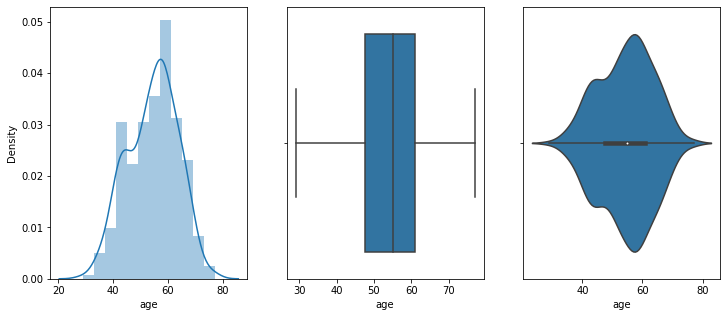

In [27]:
num(df['age'])

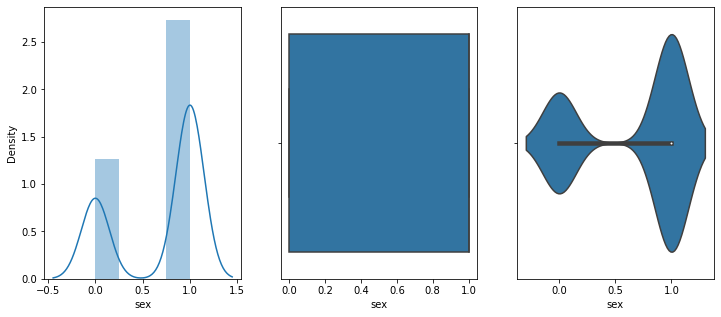

In [28]:
num(df['sex'])

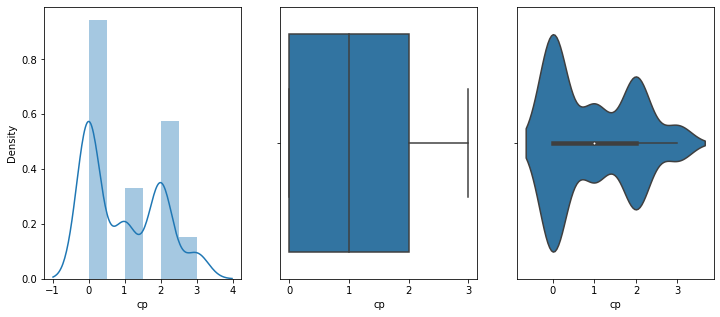

In [29]:
num(df['cp'])

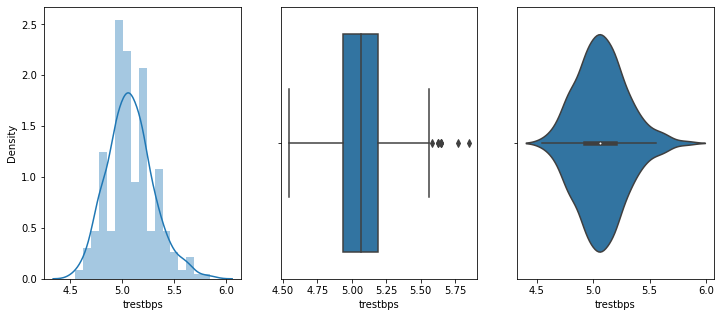

In [30]:
num(df['trestbps'])

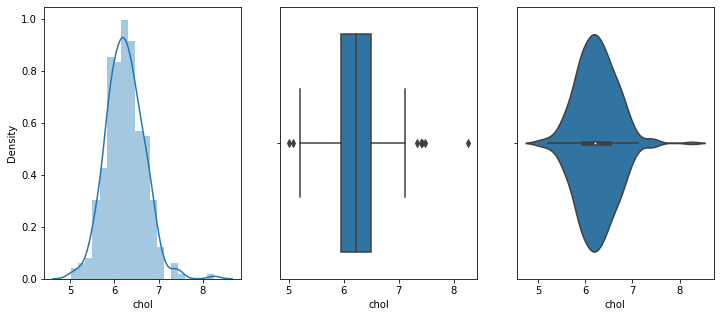

In [31]:
num(df['chol'])

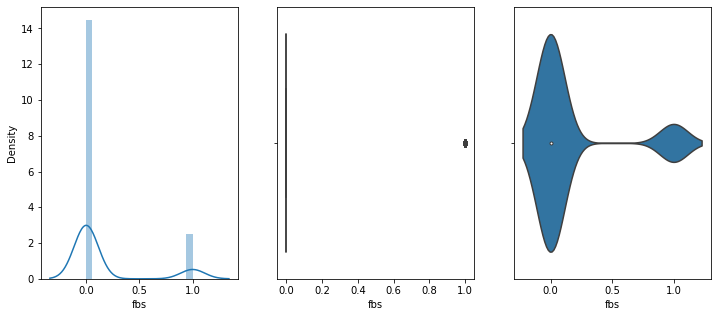

In [32]:
num(df['fbs'])

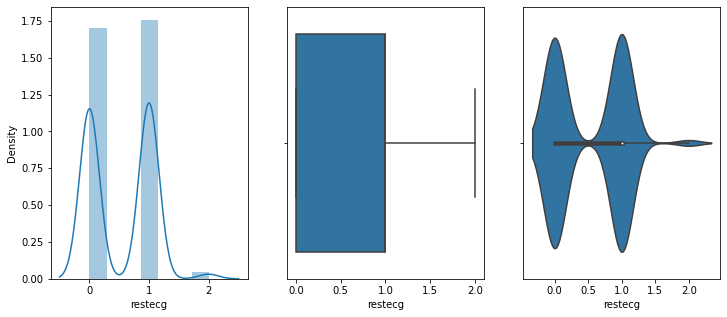

In [34]:
num(df['restecg'])

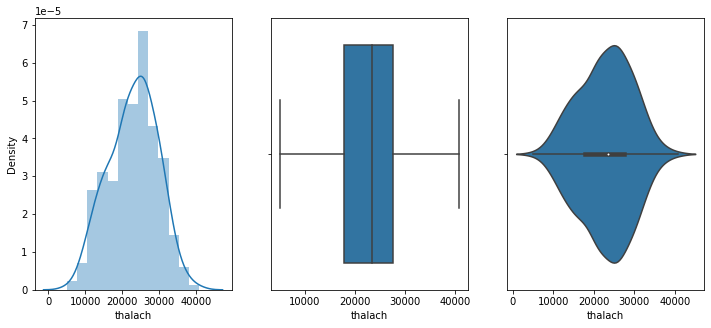

In [35]:
num(df['thalach'])

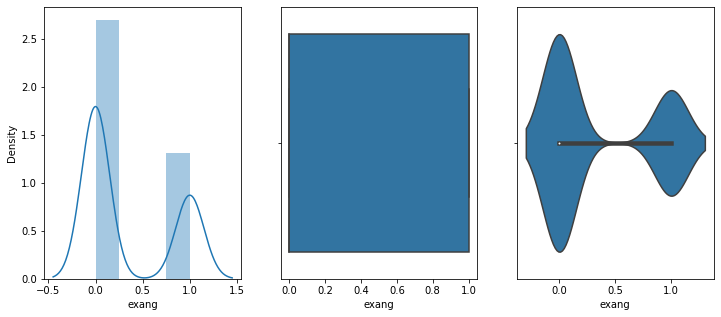

In [36]:
num(df['exang'])

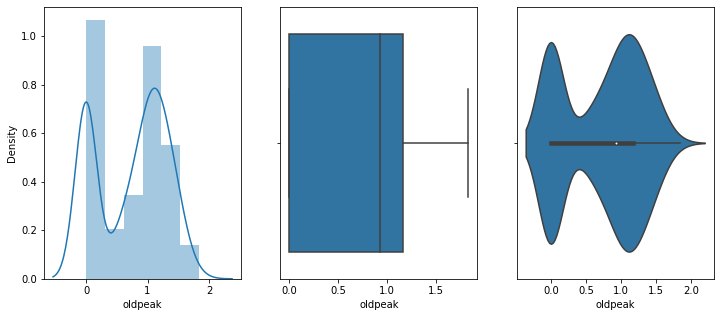

In [37]:
num(df['oldpeak'])

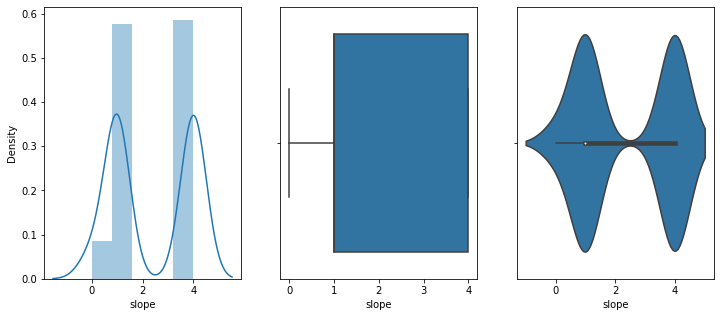

In [38]:
num(df['slope'])

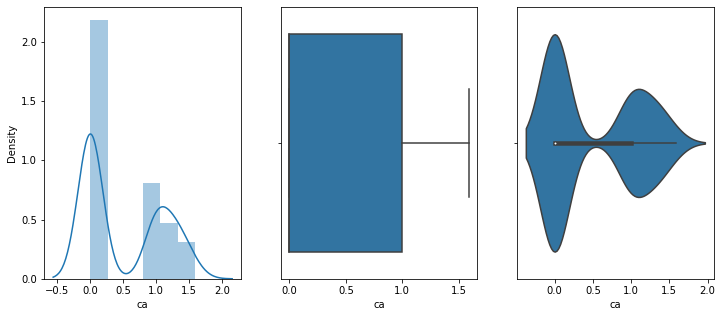

In [39]:
num(df['ca'])

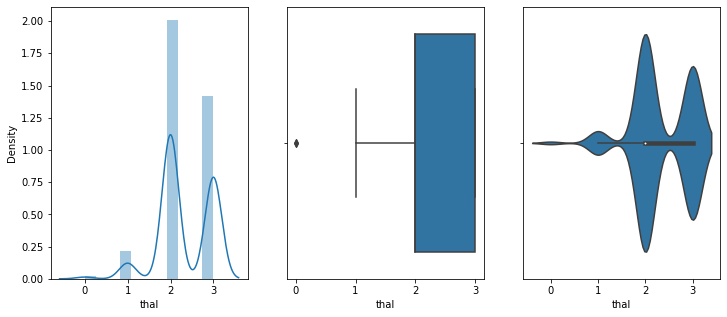

In [40]:
num(df['thal'])

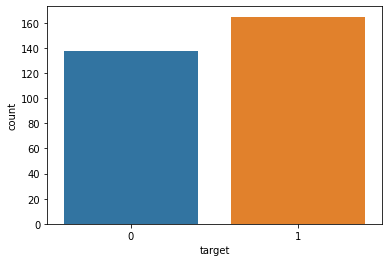

In [66]:
sns.countplot(df['target'])
plt.show()

**Multivariate Analysis**

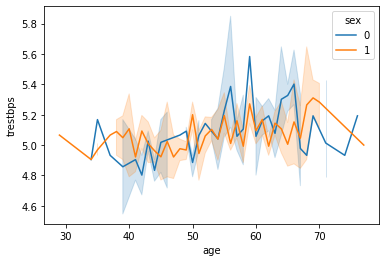

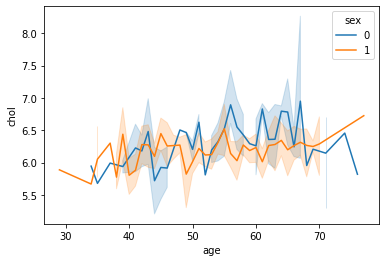

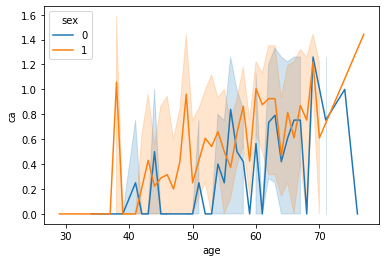

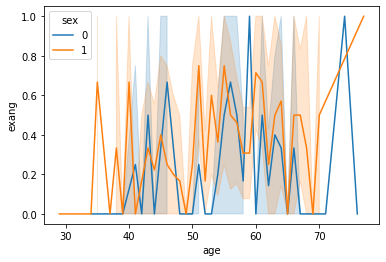

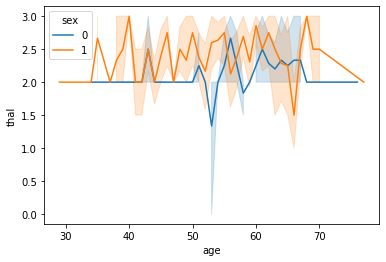

In [45]:
# (1 = male; 0 = female)

sns.lineplot(df['age'],df['trestbps'],hue=df['sex'])
plt.show()
sns.lineplot(df['age'],df['chol'],hue=df['sex'])
plt.show()
sns.lineplot(df['age'],df['ca'],hue=df['sex'])
plt.show()
sns.lineplot(df['age'],df['exang'],hue=df['sex'])
plt.show()
sns.lineplot(df['age'],df['thal'],hue=df['sex'])
plt.show()

**exang**

exercise induced angina (1 = yes; 0 = no)

**oldpeak**

ST depression induced by exercise relative to rest




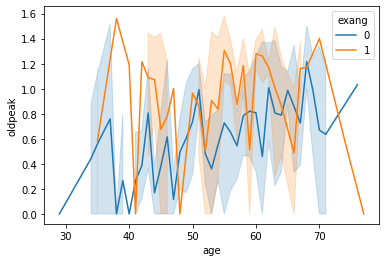

In [48]:
sns.lineplot(df['age'],df['oldpeak'],hue=df['exang'])
plt.show()

**Multivariate** 

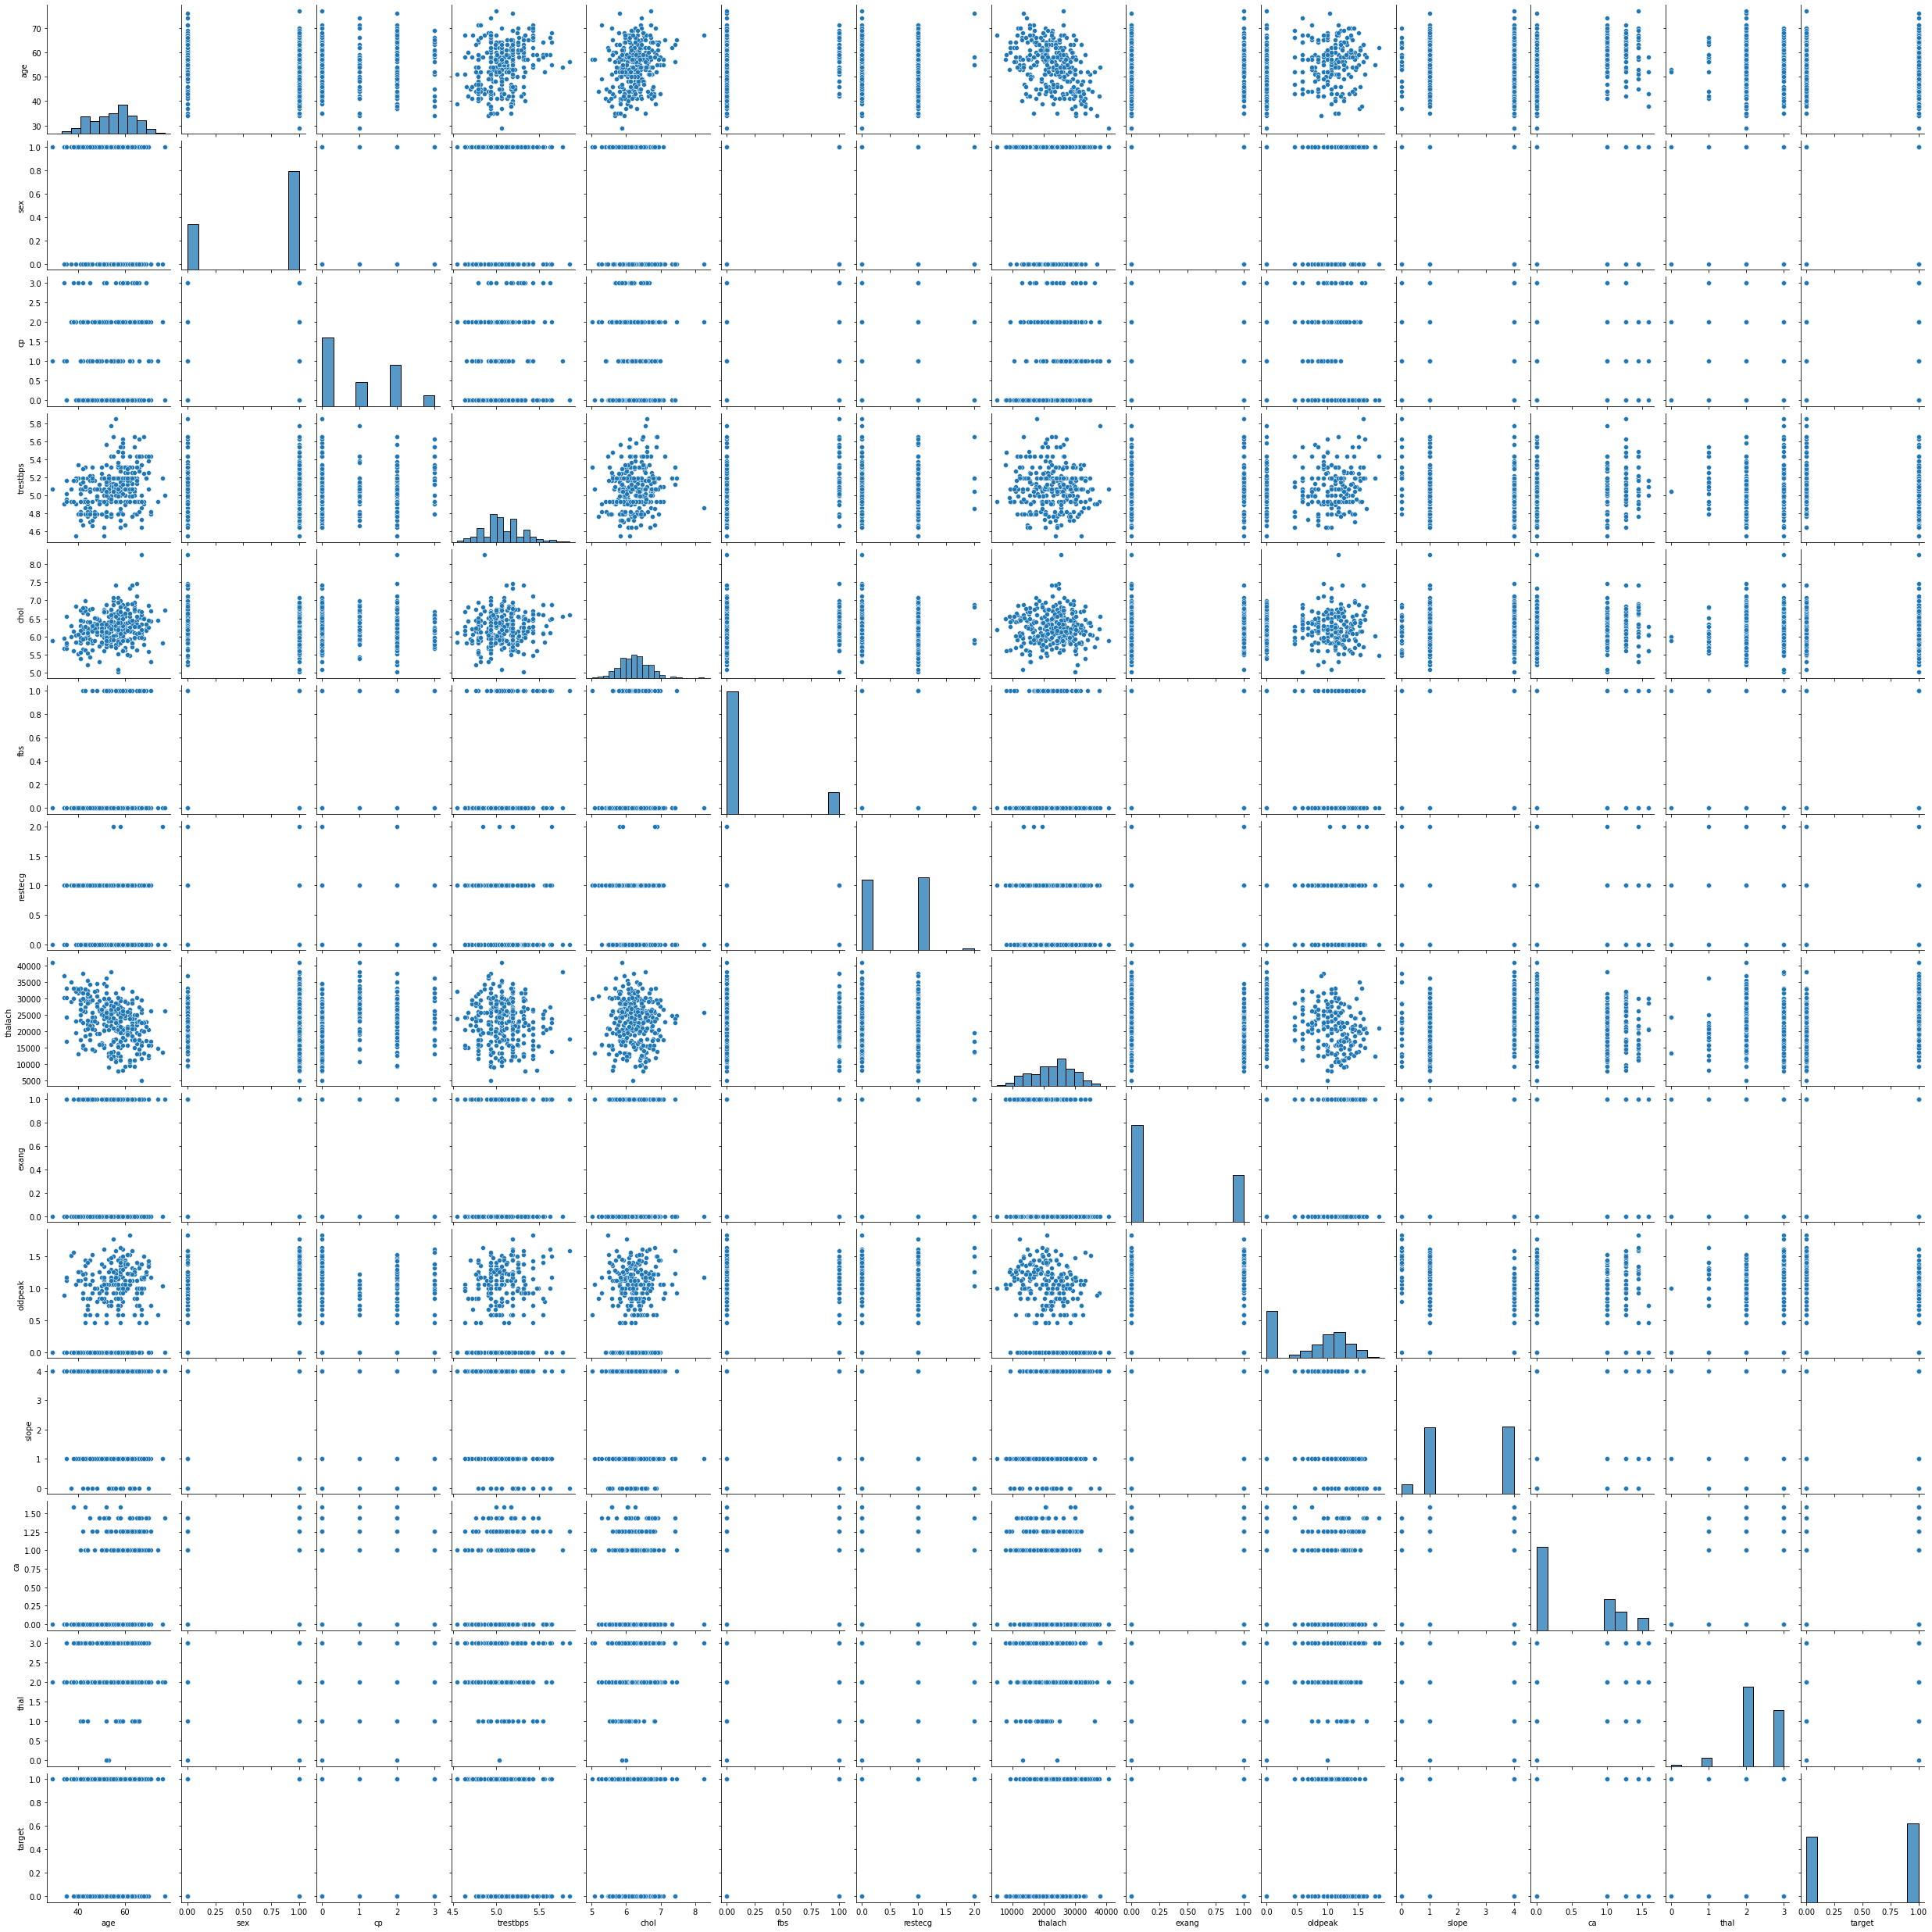

In [49]:
sns.pairplot(df)

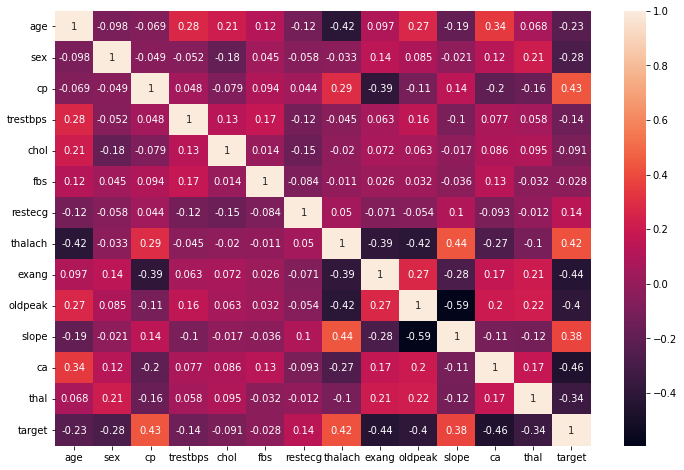

In [51]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [52]:
x=df.drop(columns='target')
y=df['target']

In [56]:
# Scaling of Data
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_sc=pd.DataFrame(ss.fit_transform(x),columns=x.columns)
X_sc.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.952197,0.681005,1.973123,0.797030,-0.200952,2.394438,-1.005832,-0.063213,-0.696631,1.051225,-1.477658,-0.836653,-2.148873
1,-1.915313,0.681005,1.002577,-0.051063,0.142610,-0.417635,0.898962,1.826501,-0.696631,1.404440,-1.477658,-0.836653,-0.512922
2,-1.474158,-1.468418,0.032031,-0.051063,-0.827835,-0.417635,-1.005832,1.010389,-0.696631,0.692615,1.051892,-0.836653,-0.512922
3,0.180175,0.681005,0.032031,-0.653396,-0.139137,-0.417635,0.898962,1.328650,-0.696631,0.353503,1.051892,-0.836653,-0.512922
4,0.290464,-1.468418,-0.938515,-0.653396,1.963049,-0.417635,0.898962,0.553456,1.435481,0.202295,1.051892,-0.836653,-0.512922


**Splitting into train and test**

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
xtrain,xtest,ytrain,ytest=train_test_split(X_sc,y,test_size=0.2,random_state=10)

In [60]:
print(xtrain.shape)
print(xtest.shape)

(242, 13)
(61, 13)


In [61]:
print(ytrain.shape)
print(ytest.shape)

(242,)
(61,)


In [83]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier



In [70]:
kn=KNeighborsClassifier()
kn.fit(xtrain,ytrain)
ypred1=kn.predict(xtest)

              precision    recall  f1-score   support

           0       0.80      0.93      0.86        30
           1       0.92      0.77      0.84        31

    accuracy                           0.85        61
   macro avg       0.86      0.85      0.85        61
weighted avg       0.86      0.85      0.85        61

[[28  2]
 [ 7 24]]


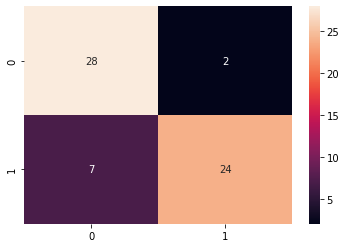

correct classification:  0.8524590163934426
Miss classification:  0.14754098360655737


In [74]:
print(classification_report(ypred1,ytest))
cm1=confusion_matrix(ypred1,ytest)
print(cm1)

sns.heatmap(cm1,annot=True)
plt.show()
TN=cm1[0,0]
TP=cm1[1,1]
FP=cm1[0,1]
FN=cm1[1,0]
tot=TN+TP+FP+FN
print('correct classification: ',((TP+TN)/tot))
print('Miss classification: ',((FP+FN)/tot))


In [139]:
rfc=RandomForestClassifier()
rfc.fit(xtrain,ytrain)
ypred2=rfc.predict(xtest)

              precision    recall  f1-score   support

           0       0.71      0.83      0.77        30
           1       0.81      0.68      0.74        31

    accuracy                           0.75        61
   macro avg       0.76      0.76      0.75        61
weighted avg       0.76      0.75      0.75        61

[[25  5]
 [10 21]]


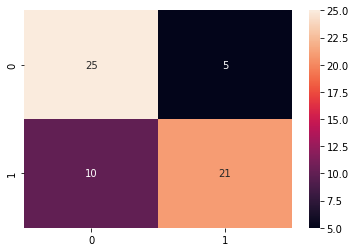

correct classification:  0.7540983606557377
Miss classification:  0.2459016393442623


In [140]:
print(classification_report(ypred2,ytest))
cm2=confusion_matrix(ypred2,ytest)
print(cm2)

sns.heatmap(cm2,annot=True)
plt.show()
TN=cm2[0,0]
TP=cm2[1,1]
FP=cm2[0,1]
FN=cm2[1,0]
tot=TN+TP+FP+FN
print('correct classification: ',((TP+TN)/tot))
print('Miss classification: ',((FP+FN)/tot))


In [77]:
dt=DecisionTreeClassifier()
dt.fit(xtrain,ytrain)
ypred3=dt.predict(xtest)

              precision    recall  f1-score   support

           0       0.71      0.86      0.78        29
           1       0.85      0.69      0.76        32

    accuracy                           0.77        61
   macro avg       0.78      0.77      0.77        61
weighted avg       0.78      0.77      0.77        61

[[25  4]
 [10 22]]


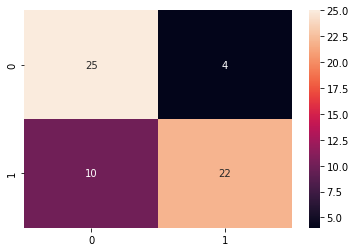

correct classification:  0.7704918032786885
Miss classification:  0.22950819672131148


In [78]:
print(classification_report(ypred3,ytest))
cm3=confusion_matrix(ypred3,ytest)
print(cm3)

sns.heatmap(cm3,annot=True)
plt.show()
TN=cm3[0,0]
TP=cm3[1,1]
FP=cm3[0,1]
FN=cm3[1,0]
tot=TN+TP+FP+FN
print('correct classification: ',((TP+TN)/tot))
print('Miss classification: ',((FP+FN)/tot))


In [79]:
ada=AdaBoostClassifier()
ada.fit(xtrain,ytrain)
ypred4=ada.predict(xtest)

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        35
           1       0.81      0.81      0.81        26

    accuracy                           0.84        61
   macro avg       0.83      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61

[[30  5]
 [ 5 21]]


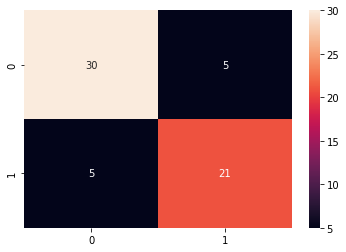

correct classification:  0.8360655737704918
Miss classification:  0.16393442622950818


In [82]:
print(classification_report(ypred4,ytest))
cm4=confusion_matrix(ypred4,ytest)
print(cm4)
t4=cm4[1][0]

sns.heatmap(cm4,annot=True)
plt.show()
TN=cm4[0,0]
TP=cm4[1,1]
FP=cm4[0,1]
FN=cm4[1,0]
tot=TN+TP+FP+FN
print('correct classification: ',((TP+TN)/tot))
print('Miss classification: ',((FP+FN)/tot))



In [84]:
xgb=XGBClassifier()
xgb.fit(xtrain,ytrain)
ypred5=xgb.predict(xtest)

              precision    recall  f1-score   support

           0       0.80      0.85      0.82        33
           1       0.81      0.75      0.78        28

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61

[[28  5]
 [ 7 21]]


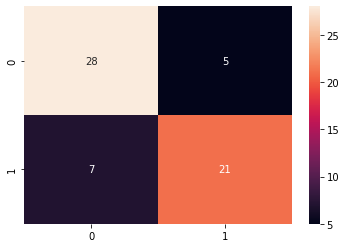

correct classification:  0.8032786885245902
Miss classification:  0.19672131147540983


In [85]:
print(classification_report(ypred5,ytest))
cm5=confusion_matrix(ypred5,ytest)
print(cm5)
t5=cm5[1][0]

sns.heatmap(cm5,annot=True)
plt.show()
TN=cm5[0,0]
TP=cm5[1,1]
FP=cm5[0,1]
FN=cm5[1,0]
tot=TN+TP+FP+FN
print('correct classification: ',((TP+TN)/tot))
print('Miss classification: ',((FP+FN)/tot))


In [141]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators':[800],
    'max_depth': range(1,30)
}

n_folds = 5


gr = GridSearchCV(estimator = rfc, param_grid = param_grid, 
                          cv = n_folds, verbose = 1)

gr.fit(xtrain,ytrain)

Fitting 5 folds for each of 29 candidates, totalling 145 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': range(1, 30), 'n_estimators': [800]},
             verbose=1)

In [142]:
gr.best_params_

{'max_depth': 19, 'n_estimators': 800}

In [144]:
dt1=RandomForestClassifier(n_estimators=800,max_depth= 19)
dt1.fit(xtrain,ytrain)
ypred6=dt1.predict(xtest)

              precision    recall  f1-score   support

           0       0.80      0.85      0.82        33
           1       0.81      0.75      0.78        28

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61

[[28  5]
 [ 7 21]]


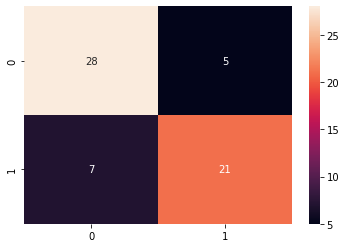

correct classification:  0.8032786885245902
Miss classification:  0.19672131147540983


In [145]:
print(classification_report(ypred6,ytest))
cm6=confusion_matrix(ypred6,ytest)
print(cm6)
t6=cm6[1][0]

sns.heatmap(cm6,annot=True)
plt.show()
TN=cm6[0,0]
TP=cm6[1,1]
FP=cm6[0,1]
FN=cm6[1,0]
tot=TN+TP+FP+FN
print('correct classification: ',((TP+TN)/tot))
print('Miss classification: ',((FP+FN)/tot))


In [148]:
# From all these models we can infer that highest accracy goes to KNN where as least type 2 error go to Tuned RFC 

In [147]:
# Even though Tuned RFC has the least type2 error among all the model, but still there is no significant difference between RFC and KNN
# Thus we can go with KNN Model .